# EE460J Kaggle Midterm Report

### Utsha Khondkar (uk734)

## 0. Index
1. Introduction
2. Summary of Each Day (day1-day8)
3. All Different Classifiers I Tried
4. Other Methods I Tried
5. How I tuned XGBoost
6. How I Did Feature Engineering
7. What Went Well
8. What Didn't Go Well
9. What I learned from This Midterm
10. Conclusion

In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import LinearSVC, SVC
import numpy as np
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.model_selection import GridSearchCV
import pandas as pd
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier

In [2]:
data = pd.read_csv('train_final.csv')
X_pred_data = pd.read_csv('test_final.csv')
X_pred = np.asarray(X_pred_data.iloc[:, 1:25]).reshape(-1, 24)

In [3]:
X = np.asarray(data.iloc[:, 2:26]).reshape(-1, 24)
y = np.asarray(data.iloc[:, 1]).reshape(-1, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 1. Introduction

In this document, I will report my overall achievement and learning in the Kaggle Midterm. 

To keep things organized, I created separate .ipynb notebooks for all 8 days during the competition. For detial codes, please refer to each day's notebook or pdf if needed. I tried to add comments there too so it won't be painful to read them. (There are a lot of redundancies and gridsearches which will make this report hard to read and not concise). Specifically, only days 2, 4, 6, 7, 8 are worth seeing. 

Another reason not putting everything here is a bug that using XGBoost and pyplotlib toghether kills the kernel.

However, I will put some codes in report, which I think were important.

## 2. Summary of Each Day (Day1-Day8)

#### Day1

First of all I figured out how to import data using pandas DataFrame, and pre-processed to numpy ndarray so it's easier to process the data.

Then I tried Logistic Regression and Random Forest as starting point. Logistic Regression didn't do a very good job but Random Forest gave me about 86% on public leader board.

I also tried forward feature selection. However, since there were only 24 features (which is not  a lot), it's not essentially needed to remove feature. (Dr. Caramanis advised me that). In addition, it didn't improve the score, so I stopped trying it.

Finally I figured out how to output my predictions to a csv, following the proper submission styling.

#### Day2

On day2, I started to use XGBClassifier, and tuned it's hyper parameters. Along the tuning, I observed that the test AUC score improved. I got a 89% AUC score on public leaderboard this day, and got excited that I could improve to get 90% easily. However, it turned out it wasn't easy later...

#### Day3

On day3, I tuned XGBClassifier in a more careful way than how I did in day2. Since XGBClassifier worked well, I decided to spend some more time to get the best out of it, so I spend another day only to tune it.

#### Day4

On day4, I wanted to try stacking. To make stacking work, I thought I should tune as many different classifiers as I could, and see which one could be base models for stacking. Also, I thought it would be nice to try many classifiers, to get something better than XGBClassifier, or to procve XGBClassifier worked the best (at least without any stacking or bagging). So I tried and tuned RandomForest, Logistic Regression, Quadratic Discrimant Analysis, Support Vector Machine, K-Nearest Neighbors, and Bagging.  

#### Day5

On day5, I tried to use some classifiers I tuned in day4 to do stacking. However I faced the issue of dead kernel frequently, and couldn't solve it so decided to try feature engineering instead. (When I realized that I could use Google Colab to avoid that issue, it was too late. And I tried little bit but stacking didn't improve the score much anyway).

#### Day6

On day6, I tried to remove outliers (which I noticed to be wrong on the following day). Detail description below.

#### Day7

On day7, I removed outliers by seeing histogram for each features and by trying to see any kind of "distribution shape".
Then using that "modified traiing set", I trained XGBClassifier (already tuned from day3), and observed some improvement.

#### Day8

On day8, I re-tuned XGBClassifier with my modified dataset (i.e. without outliers), and I observed improvement on performance (above 95% AUC score on unseen test data). However my Kaggle public leaderboard didn't improve, because I think my model was underfitting (since I might have removed too many samples, which could have some important information). More detail description below.

## 3. All Different Classifiers I tried

These are classifiers I tuned, with final version of tuned parameters. (after several grid searching).

In [5]:
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0.1,
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=5, missing=None, n_estimators=3000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.0001, reg_lambda=0.001, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)
xgbc.fit(X_train, y_train.ravel())
print('training Accuracy: %f' % metrics.accuracy_score(y_train, xgbc.predict(X_train)))
print('training AUC: %f' %metrics.roc_auc_score(y_train, xgbc.predict_proba(X_train)[:, 1]))
print('test Accuracy: %f' % metrics.accuracy_score(y_test, xgbc.predict(X_test)))
print('test AUC: %f' %metrics.roc_auc_score(y_test, xgbc.predict_proba(X_test)[:, 1]))

training Accuracy: 0.997864
training AUC: 0.999986
test Accuracy: 0.957278
test AUC: 0.869247


In [5]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.3, min_samples_split=0.6,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf.fit(X_train, y_train.ravel())
print('training Accuracy: %f' % metrics.accuracy_score(y_train, rf.predict(X_train)))
print('training AUC: %f' %metrics.roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))
print('test Accuracy: %f' % metrics.accuracy_score(y_test, rf.predict(X_test)))
print('test AUC: %f' %metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

training Accuracy: 0.940714
training AUC: 0.694711
test Accuracy: 0.947818
test AUC: 0.680516


In [6]:
lr = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
lr.fit(X_train, y_train.ravel())
print('training Accuracy: %f' % metrics.accuracy_score(y_train, lr.predict(X_train)))
print('training AUC: %f' %metrics.roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]))
print('test Accuracy: %f' % metrics.accuracy_score(y_test, lr.predict(X_test)))
print('test AUC: %f' %metrics.roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

training Accuracy: 0.940714
training AUC: 0.505713
test Accuracy: 0.947818
test AUC: 0.489829


In [7]:
qda = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.5,
               store_covariance=False, store_covariances=None, tol=0.0001)
qda.fit(X_train, y_train.ravel())
print('training Accuracy: %f' % metrics.accuracy_score(y_train, qda.predict(X_train)))
print('training AUC: %f' %metrics.roc_auc_score(y_train, qda.predict_proba(X_train)[:, 1]))
print('test Accuracy: %f' % metrics.accuracy_score(y_test, qda.predict(X_test)))
print('test AUC: %f' %metrics.roc_auc_score(y_test, qda.predict_proba(X_test)[:, 1]))

training Accuracy: 0.149474
training AUC: 0.581114
test Accuracy: 0.148917
test AUC: 0.550295


In [8]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=1,
           weights='uniform')
knn.fit(X_train, y_train.ravel())
print('training Accuracy: %f' % metrics.accuracy_score(y_train, knn.predict(X_train)))
print('training AUC: %f' %metrics.roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1]))
print('test Accuracy: %f' % metrics.accuracy_score(y_test, knn.predict(X_test)))
print('test AUC: %f' %metrics.roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

training Accuracy: 0.941782
training AUC: 0.889626
test Accuracy: 0.947208
test AUC: 0.685346


In [9]:
bag = BaggingClassifier(n_estimators=100, n_jobs = -1, verbose = 0)
bag.fit(X_train, y_train.ravel())
print('training Accuracy: %f' % metrics.accuracy_score(y_train, bag.predict(X_train)))
print('training AUC: %f' %metrics.roc_auc_score(y_train, bag.predict_proba(X_train)[:, 1]))
print('test Accuracy: %f' % metrics.accuracy_score(y_test, bag.predict(X_test)))
print('test AUC: %f' %metrics.roc_auc_score(y_test, bag.predict_proba(X_test)[:, 1]))

training Accuracy: 1.000000
training AUC: 1.000000
test Accuracy: 0.963381
test AUC: 0.828170


Therefore, among these classifiers, only ones that I could rely on were XGBClassifier and BaggingClassifier (and stacking them). I also tried bagging with base being XGBClassifier, but it takes way too long time on my laptop and I'm not able to put it here.

## 4. How I tuned Hyper Parameters in XGBClassifier

Order of tuning : 
1. max_depth, min_child_weight
2. gamma
3. subsample, colsample_by_tree
4. reg_alpha & reg_lambda (L1 and L2 regularization)
5. reduce learning rate
6. variated n_estimators

For each of those parameters, I tried [a, b, c] where $a < b < c$ with GridSearch Cross Validation(K = 3). If $b$ was the best, then I kept $b$ as the best parameter. If $a$ worked best, I picked $d,\ e$ where $d<a<e$ and repeated the process until I get the best parameter. I think this is a similar way to gradient descent, or similar motivation to the "intermediate value theorem" in mathematics. Doing this way, I avoided "brute-force" style of grid search which shortend the runtime a lot.

## 5. How I Did Feature Engineering

On the 6th day of competition, I came up with an idea to remove outliers. That is, for each feature, I counted the number of samples that have a value $X>3\sigma\ or\ X<-3\sigma$. Then, if the percentage of such "outlining" samples matched the CDF of a Gaussian, I concluded the feature came from a Gaussian distribution, and removed those samples. 

However, that was wrong. Having certain amount of samples out of $3\sigma\ range$ doesn't mean a Gaussian distribution. 

I realized this mistake on day7, and did outlier removal in a more careful way.
For each features, I plotted the histogram, and tried observe a "distribution shape". Then, I counted the number of potential outliers if I assumed such distribution. Finally, with respect to most features, I removed about 0.1% - 0.5% outliers. 

My motivation was that, by removing outliers I get more constant (less variance) performance. Since I always turned on the "Shuflle" parameter in train_test_split(), I always got a different result. I thought it was because there were some "bad samples", and depending on how many of them were included in my training split, my model worked well or not. 

I will show the detail steps of my "wrong process" on day6 and "correct (I believe) process" on day7 below. 

In [10]:
mean = []
std = []
for i in range(X.shape[1]):
    mean.append(np.mean(X[:, i]))
    std.append(np.std(X[:, i]))

In [11]:
%%capture
hists = []
new_hists = []
for i in range(X.shape[1]):
    plt.hist(X[:, i], bins=30)
    plt.title('(before cleaning)  feature' + str(i+1) + "   $\mu$ : %.1f     $\sigma$ : %.1f" %(mean[i], std[i]))
    hists.append(plt.gcf())
    plt.show()

### Feature 1

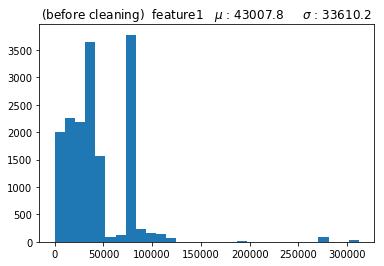

In [12]:
hists[0]

In [13]:
print("<feature 1> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 0] > 150000)[0])/X.shape[0]), "%")

<feature 1> outliers observation by eye:
0.696 %


In [14]:
del1 = np.flip(np.where(X[:, 0] > 150000)[0])

In [15]:
for i in del1:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

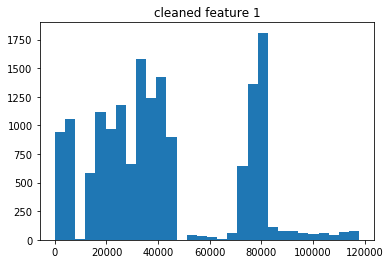

In [16]:
plt.hist(X[:, 0], bins = 30)
plt.title("cleaned feature 1")
new_hists.append(plt.gcf())
plt.show()

Here, I can observe a better detail in the distribution of feature 1, which was not apparent before removing those 0.696% (potential) outliers. I will show 1 more example. 
#### For the rest, please look at day7.pdf

### Feature 8

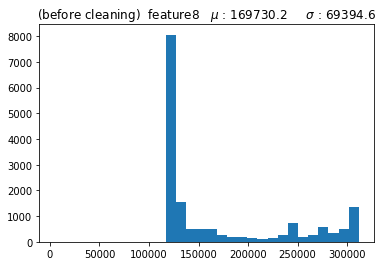

In [17]:
hists[7]

In [18]:
print("<feature 8> outliers observation by eye:")
print("%.3f" %(100 * len(np.where(X[:, 7] < 110000)[0])/X.shape[0]), "%")

<feature 8> outliers observation by eye:
0.061 %


In [19]:
del8 = np.flip(np.where(X[:, 7] < 110000)[0])

In [20]:
for i in del8:
    X = np.delete(X, i, 0)
    y = np.delete(y, i, 0)

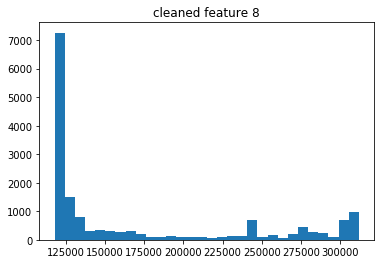

In [21]:
plt.hist(X[:, 7], bins = 30)
plt.title("cleaned feature 8")
new_hists.append(plt.gcf())
plt.show()

I think it's even easier to see the effect of outlier removing in this feature 8.

## 6. What Went Well

1. I think my tuning of XGBCLassifier was good. I did the whole process of optimizing parameters several times using step-by-step grid searching, and each time I got similar but sloghtly different final parameters.

2. The feature engineering (removal of outliers) I did on day7 worked well. Because of that, I achieved above 95% test AUC (i.e. on unseen data) in local machine. 

## 7. What Didn't Go Well

However, when I got 95% AUC score on test set (unseen, local), my Kaggle public leaderboard score was still about 89%.
I guess it is because by removing some samples, my model didn't learn some things that it should have learned. So it's not overfitting, as it worked well with unseen data, but it's more like underfitting. I think the way I "removed" outliers were not completely wrong, but not the best way. I can say it's overfitted on entire labeled data.

For some reason, using XGBoost and pyplotlib together killed the kernel all the time. I think it is an issue of MacOS (I Google searched and found that other people had similar issue on MacOS). It was really annoying as I could not use any visualization during I was using XGBoost. To avoid that, on day7 I created multiple notebooks (e.g. day7-1, day7-2) but it didn't solve the problem essentially.

Another issue I had was memory. Whenever I wanted to do stacking, I used np.hstack() to concatenate 2 matrices and vectores, but it killed kernel every time. Because of that I got really annoyed and couldn't spend a long time on stacking. It wasn't a problem on Google Colab, but it was somewhat inconvenient not being able to work on local machine. And when I realized it works in Google Colab it was too late.

Then, "Shuffle" in train_test_split. I think shuffling samples is not a bad idea, but since our dataset was by default shuffled, it wasn't necessary. I always kept the shuffle parameter True in my train_test_split(), so it made it difficult to reproduce the same result even when I wanted (as once I shutdown my computer, kernel was shutdown and that "instance" of train_test_split was gone). Because of that, I wasn't able to "build up" on a previous model with the same training set, and it was sometimes hard to tell if I made improvement or not. 

## 8. What I Learned from This Competition

1. How strong XGBoost is, and how to tune its hyper parameters to make it work best, but not overfit.


2. How to look at each features, and explore their distribution. And how removing outlier samples affects the performance.


3. Combining all of the machine learning techniques I learned so far in this semester. (Including Bagging, Stacking).


4. Validation techniques (splitting training & test set, using Cross Validation to reduce bias in error).

## 9. Conclusion

Through the competetion, I always felt that computational power is one of the most important things. Although wise planning and choosing correct algorithm helps to optimize the processing time, there is still limitation. And I really needed better RAM to avoid kernel dead during stacking. 

If I were given more time to work on this dataset, I would spend much longer time on stacking, and see their effects. 

Another thing I am interested is, gererative classifier. Since I explored each of all 24 features in detail, I got some idea for (some of) features, like what kind of distribution it is. Specifically, each histogram after removing outliers shows PDF (Probability Density Function). For example, feature 14 seems like Gaussian. Features 5, 6, 9, 11, 18, 20, 21, 22, 24 seemed like "exponential PDF" with a integer flooring function. 

These assumptions could be wrong, but if it were possible to guess distribution of how each feature were generated, I think I could use try generative classifiers and see what happens.

Finally, I think I spent too long time on tuning XGBClassifier and removing outliers. The way the algorithm of extreme gradient boost works does takes care of outliers, so it was an unnecessary redundancy. I should have spend more time on stacking, if not on my machine, on Google Colab. But I was really curious about the data itself as we had no information, and I wanted to explore it.

#### Thanks for reading. If you haven't, please take a look at my day7.pdf, day3 pdf, and day4.pdf, where I think I did the most core part .